# Machine Learning Project

In [1]:
import pandas as pd # the pd is by convention
import numpy as np # as is the np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.drop(['Id'], axis=1,inplace=True)
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = df.fillna(0)

In [5]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 80)

In [7]:
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2010,WD,Normal,142125
1459,20,RL,75.0,9937,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,Normal,147500


Looking at the numeric columns:

In [8]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The test portion of data:

In [9]:
df_test = pd.read_csv('data/test.csv')
df_test.shape

(1459, 80)

In [10]:
df_test=df_test.fillna(0)

In [11]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,...,120,0,0,MnPrv,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,0,IR1,HLS,AllPub,...,144,0,0,0,0,0,1,2010,WD,Normal


Getting the number of times a value shows up in a column:

In [12]:
df.iloc[0] #grabbing the first row

MSSubClass            60
MSZoning              RL
LotFrontage           65
LotArea             8450
Street              Pave
Alley                  0
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     CollgCr
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt           2003
YearRemodAdd        2003
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           196
ExterQual             Gd
ExterCond             TA
Foundation         PConc
BsmtQual              Gd
                  ...   
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           Gd
TotRmsAbvGrd           8
Functional           Typ
Fireplaces             0
FireplaceQu            0
GarageType        Attchd
GarageYrBlt         2003


In [13]:
df.iloc[0:5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
df[["SalePrice","YrSold","YearBuilt","BedroomAbvGr","FullBath","HalfBath"]].head() #selecting columns

,SalePrice,YrSold,YearBuilt,BedroomAbvGr,FullBath,HalfBath
0,208500,2008,2003,3,2,1
1,181500,2007,1976,3,2,0
2,223500,2008,2001,3,2,1
3,140000,2006,1915,3,1,0
4,250000,2008,2000,4,2,1


In [15]:
df[["SalePrice","YrSold","YearBuilt","BedroomAbvGr","FullBath","HalfBath"]].iloc[0:5]

,SalePrice,YrSold,YearBuilt,BedroomAbvGr,FullBath,HalfBath
0,208500,2008,2003,3,2,1
1,181500,2007,1976,3,2,0
2,223500,2008,2001,3,2,1
3,140000,2006,1915,3,1,0
4,250000,2008,2000,4,2,1


### Smaller df example
- SalePrice is our target variable
- The authors recommend removing the few houses that are >4000 SQFT (based on the 'Gr Liv Area' variable)
- Many columns have missing data (based on the number of "non-null" entries in each column
- We have many predictor variables

In [16]:
expensive_df = df[df['SalePrice'] > 200000]
expensive_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,20,RL,75.0,10084,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
11,60,RL,85.0,11924,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,New,Partial,345000
13,20,RL,91.0,10652,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,New,Partial,279500
20,60,RL,101.0,14215,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,11,2006,New,Partial,325300
22,20,RL,75.0,9742,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,230000
25,20,RL,110.0,14230,Pave,0,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,7,2009,WD,Normal,256300
27,20,RL,98.0,11478,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,306000


In [17]:
df["GrLivArea"].head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

In [18]:
not_huge_df = df[df['GrLivArea'] < 4000] #removing houses that are greater than 4000 sqft
not_huge_df.shape
df.shape[0] - not_huge_df.shape[0] #How many data points we removed

4

In [19]:
smaller_df= df[['LotArea','OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'GrLivArea', 
        'FullBath', 'BedroomAbvGr',
        'Fireplaces', 'GarageCars','SalePrice']]

In [20]:
smaller_df.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,BedroomAbvGr,Fireplaces,GarageCars,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1515.463699,1.565068,2.866438,0.613014,1.767123,180921.195890
std,9981.264932,1.382997,1.112799,30.202904,20.645407,525.480383,0.550916,0.815778,0.644666,0.747315,79442.502883
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,5.000000,5.000000,1954.000000,1967.000000,1129.500000,1.000000,2.000000,0.000000,1.000000,129975.000000
50%,9478.500000,6.000000,5.000000,1973.000000,1994.000000,1464.000000,2.000000,3.000000,1.000000,2.000000,163000.000000
75%,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1776.750000,2.000000,3.000000,1.000000,2.000000,214000.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5642.000000,3.000000,8.000000,3.000000,4.000000,755000.000000


In [21]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
LotArea         1460 non-null int64
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
Fireplaces      1460 non-null int64
GarageCars      1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(11)
memory usage: 125.5 KB


In [22]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
LotArea         1460 non-null int64
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
Fireplaces      1460 non-null int64
GarageCars      1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(11)
memory usage: 125.5 KB


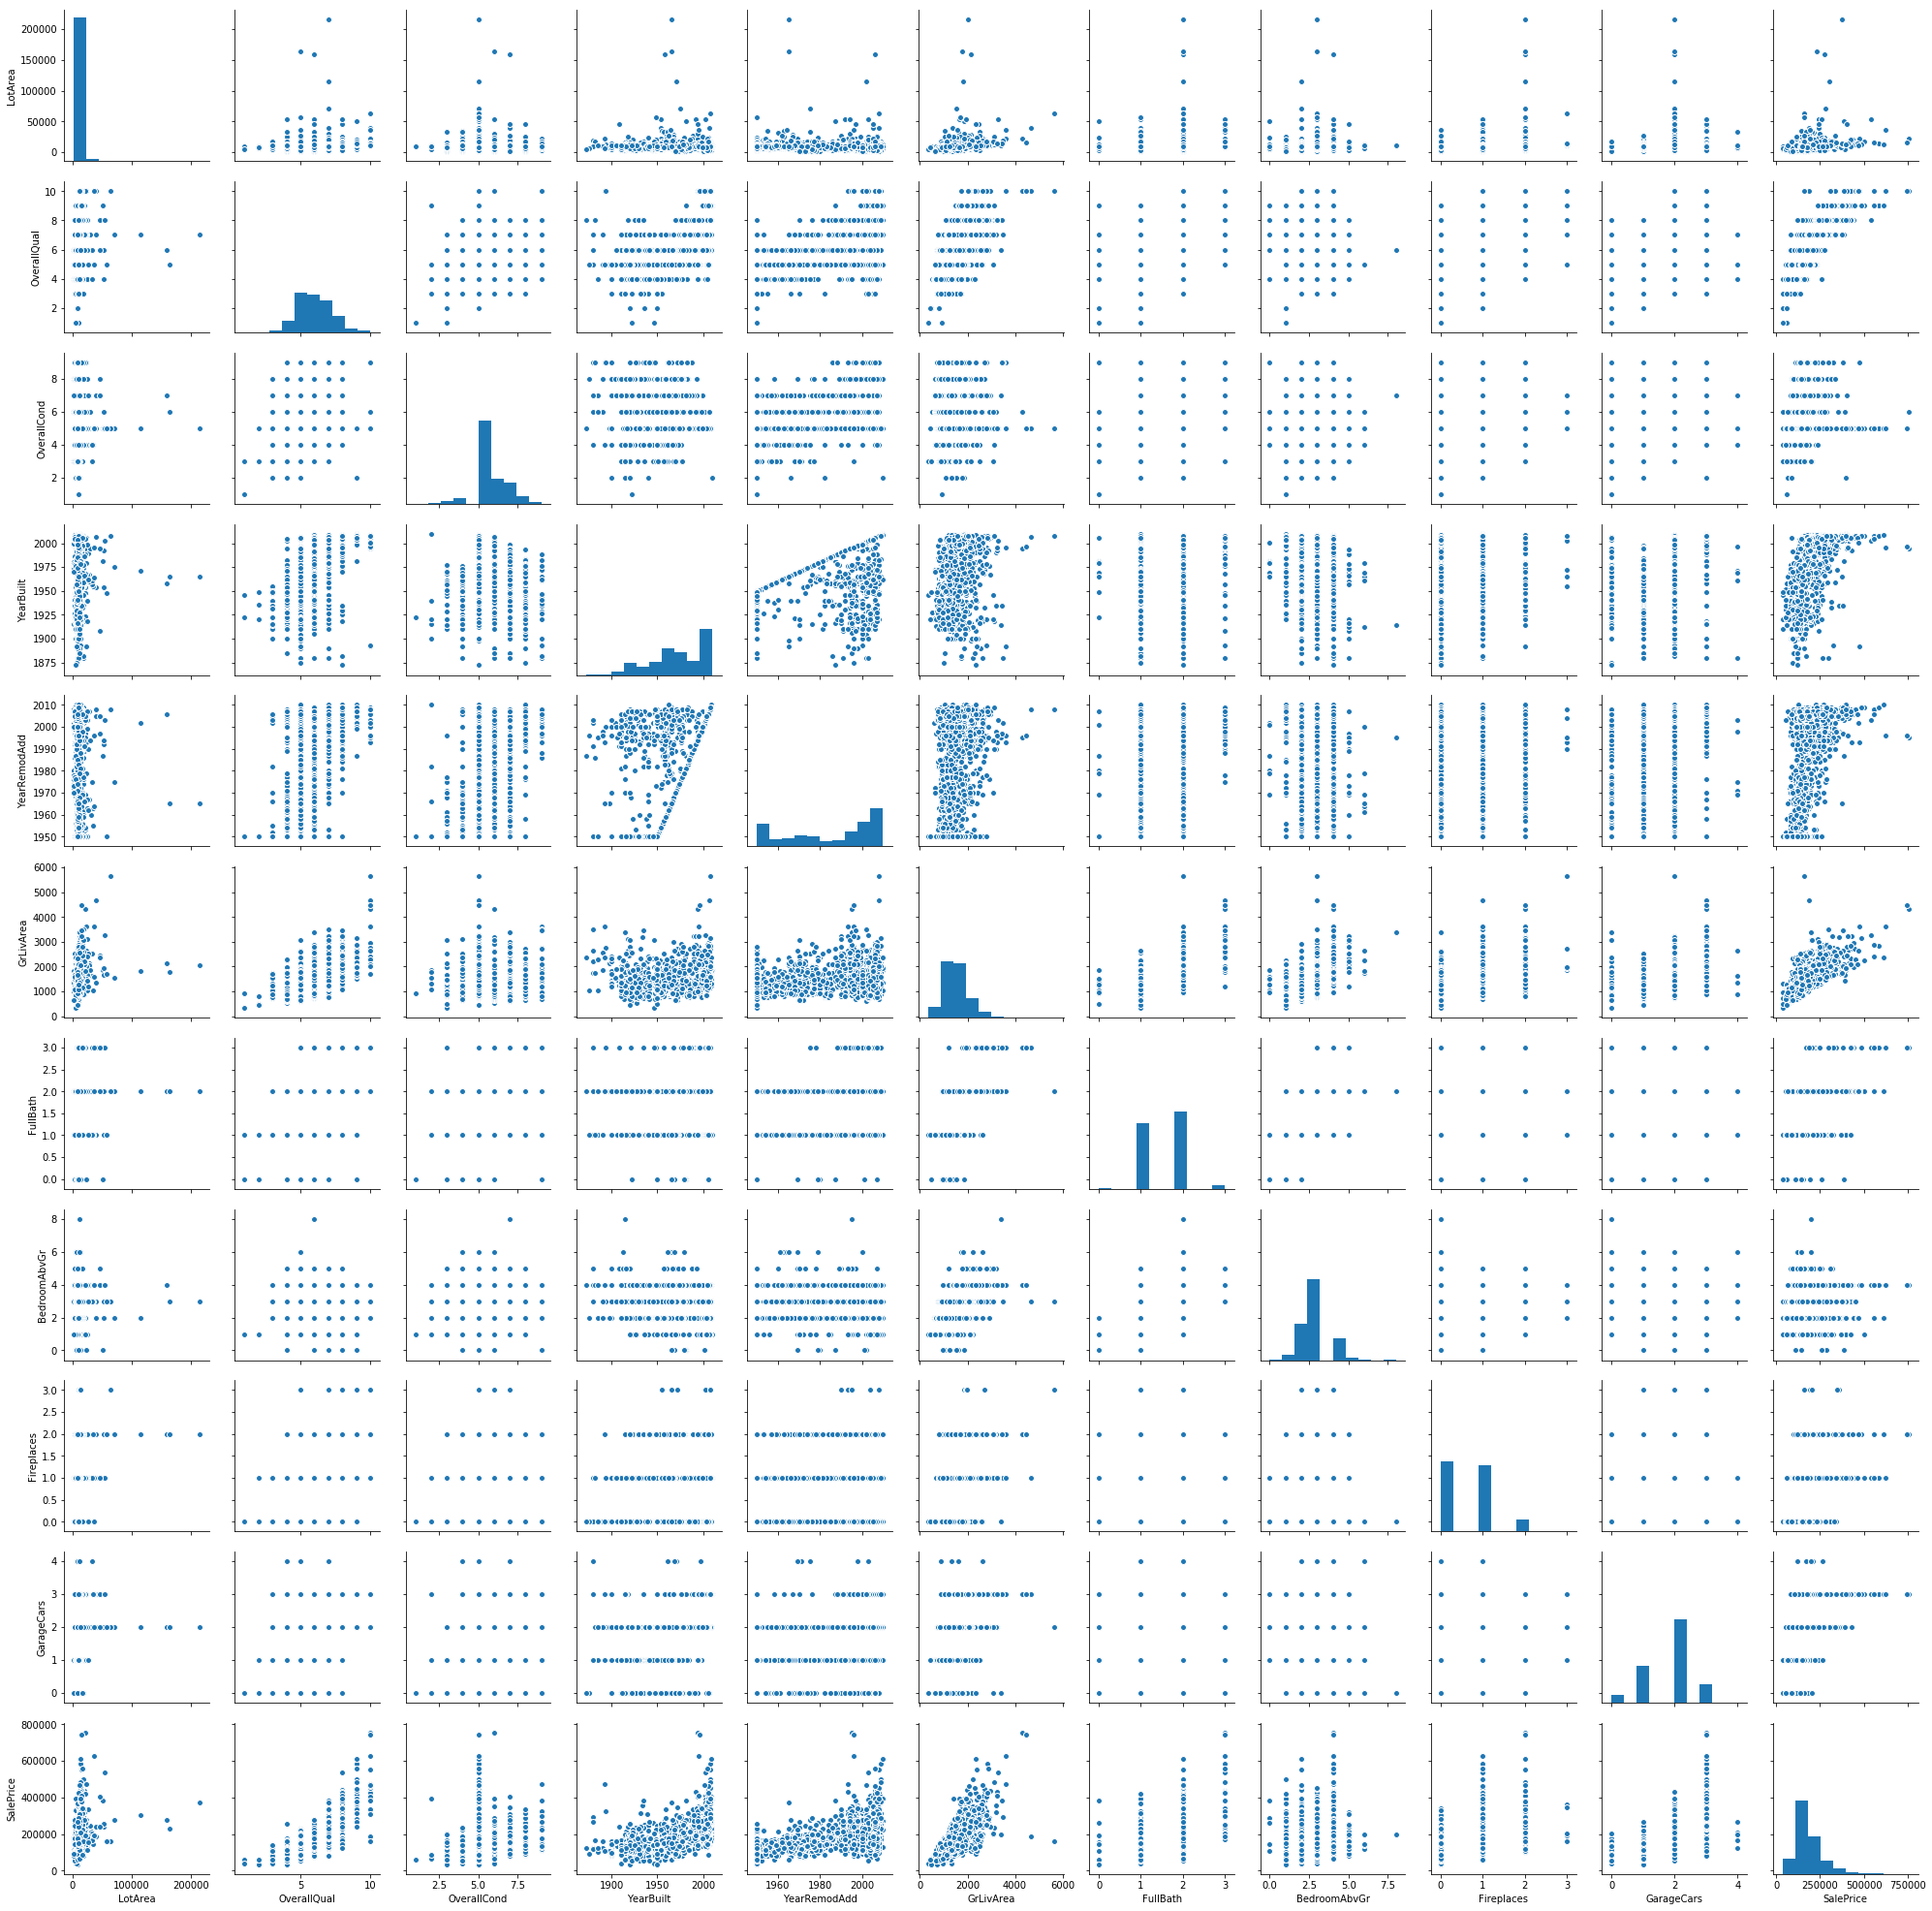

In [23]:
## Let's do a pairplot with seaborn to get a sense of the variables in this data set
sns.pairplot(smaller_df)

### Linear relationship based on pairplot:

- Which variables seem to have the strongest correlations with SalePrice?

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [25]:
df_numeric=df.select_dtypes(exclude=['object'])

In [26]:
df_numeric.shape

(1460, 37)

In [27]:
df_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [28]:
df_categorical=df.select_dtypes(include=['object'])

In [29]:
df_categorical.shape

(1460, 43)

In [30]:
df_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
df_categorical['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [32]:
y=df_numeric['SalePrice']
X=df_numeric.drop('SalePrice', 1) 

In [33]:
print(y.shape)
print(X.shape)

(1460,)
(1460, 36)


### Normality

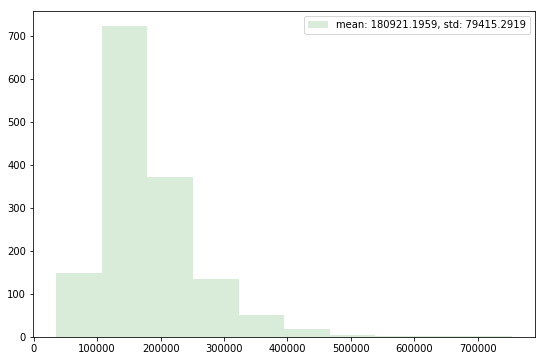

In [34]:
plt.figure(figsize=(9, 6))
#plt.xlim(-0.4, 0.4)
#plt.ylim(0, 4.3)
label = "mean: %.4f, std: %.4f" % (np.mean(y.values), np.std(y.values))
plt.hist(y.values, color='green', bins=10, normed=False, alpha=0.15, label=label)
plt.legend()
plt.show()

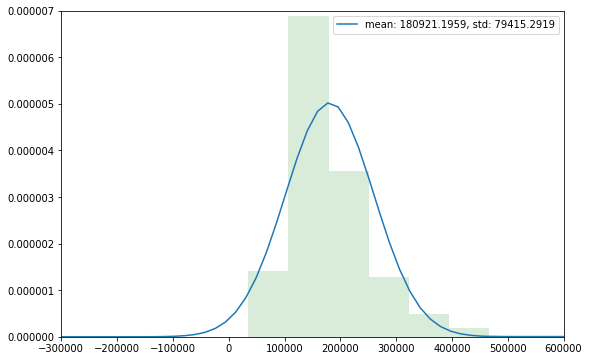

In [35]:
plt.figure(figsize=(9, 6))
plt.xlim(-300000, 600000)
plt.ylim(0, 0.000007)
plt.hist(y.values, color='green', bins=10, normed=True, alpha=0.15)
my_norm = stats.norm(np.mean(y.values), np.std(y.values)).pdf
label = "mean: %.4f, std: %.4f" % (np.mean(y.values), np.std(y.values))
plt.plot(np.linspace(-300000, 600000), my_norm(np.linspace(-300000, 600000)), label=label)
plt.legend()
plt.show()

In [36]:
not_huge_df = df[df['GrLivArea'] < 4000] #removing houses that are greater than 4000 sqft
not_huge_df.shape
df.shape[0] - not_huge_df.shape[0]

4

In [37]:
y_not_huge=not_huge_df['SalePrice']

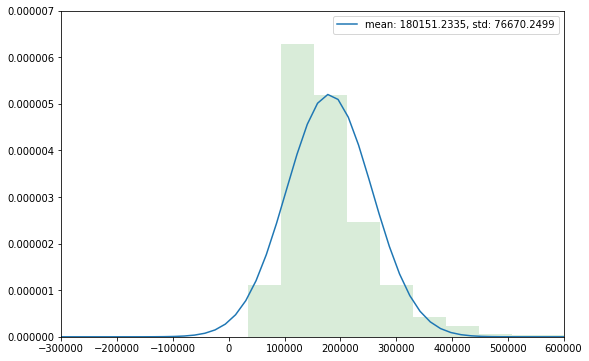

In [38]:
plt.figure(figsize=(9, 6))
plt.xlim(-300000, 600000)
plt.ylim(0, 0.000007)
plt.hist(y_not_huge.values, color='green', bins=10, normed=True, alpha=0.15)
my_norm = stats.norm(np.mean(y_not_huge.values), np.std(y_not_huge.values)).pdf
label = "mean: %.4f, std: %.4f" % (np.mean(y_not_huge.values), np.std(y_not_huge.values))
plt.plot(np.linspace(-300000, 600000), my_norm(np.linspace(-300000, 600000)), label=label)
plt.legend()
plt.show()

### Train and test set

In [39]:
#Split the data 70-30 train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [40]:
X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [41]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

## Linear Regression

In [42]:
## LinearRegression model with only numeric predictors
## SalePrice as the target

lr_model1 = LinearRegression()
lr_model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
## Let us look at the (single) variable coefficient and the intercept
lr_model1.intercept_

-781859.522387021

In [44]:
list(zip(X_train.columns,lr_model1.coef_))

[('MSSubClass', -198.88975232956355),
 ('LotFrontage', -16.749221840885525),
 ('LotArea', 0.38679632429290933),
 ('OverallQual', 18262.610471691904),
 ('OverallCond', 3681.793256189872),
 ('YearBuilt', 321.4434680451516),
 ('YearRemodAdd', 149.21753288438413),
 ('MasVnrArea', 17.80503004388393),
 ('BsmtFinSF1', 7.812666877209125),
 ('BsmtFinSF2', -2.4186097930064534),
 ('BsmtUnfSF', -1.416871451542761),
 ('TotalBsmtSF', 3.9771856288625713),
 ('1stFlrSF', 9.488377404768471),
 ('2ndFlrSF', 12.992572555695006),
 ('LowQualFinSF', 7.614197997161682),
 ('GrLivArea', 30.095147954829372),
 ('BsmtFullBath', 11899.286415708379),
 ('BsmtHalfBath', -292.38797626763613),
 ('FullBath', 4093.2351202668274),
 ('HalfBath', -2050.3005133866236),
 ('BedroomAbvGr', -9723.247649096365),
 ('KitchenAbvGr', -12188.982228970188),
 ('TotRmsAbvGrd', 5448.173155547469),
 ('Fireplaces', 5140.116321373419),
 ('GarageYrBlt', -14.048769905789413),
 ('GarageCars', 19577.177186949986),
 ('GarageArea', -1.21182833462989

In [45]:
# Getting predictions of the model on the test set

test_set_pred1 = lr_model1.predict(X_test)

In [46]:
test_set_pred1

array([147127.18826534, 309073.86328635, 118292.55073918, 182043.59576845,
       304657.92223321,  64841.57282412, 232117.05512655, 149594.2251201 ,
        62769.41239104, 147538.93415941, 152022.00561919, 110858.51377261,
        89816.10869747, 208804.82656493, 190161.33306458, 137393.08609276,
       210578.464039  , 131521.13008763, 115467.23430781, 230222.94904429,
       185915.66397233, 212301.3946482 , 190911.91187134, 130353.13373162,
       209705.97332821, 148230.65392873, 195364.98753759,  91517.05679754,
       182535.86418831, 176291.78004338, 115416.68320009, 278859.98488856,
       242895.67886528,  84771.52368997, 274711.50392651, 156775.69554635,
       144007.87472211, 214954.09686435, 308438.31005845,  88023.2004179 ,
       134874.94997277, 248756.16354629,  99092.36944422, 278679.25557459,
       133683.07896963, 121689.52792122, 102285.85634193, 124219.26967007,
       360785.41584886, 125202.06825383, 102249.821701  , 218195.28513026,
        86835.47956095, 3

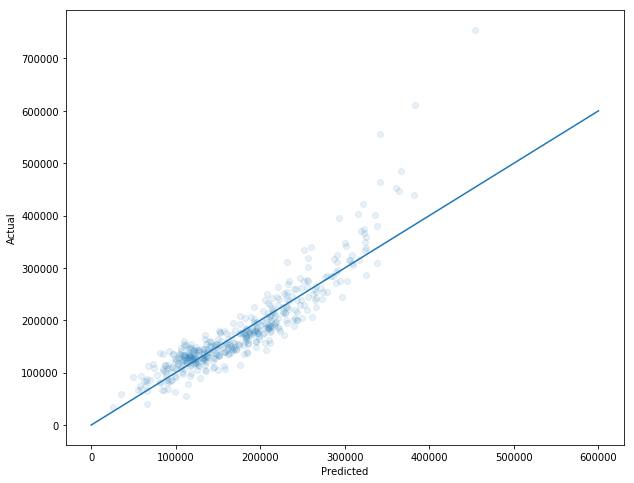

In [47]:
## Plotting the actual vs expected house price (along with the line x=y for reference)
plt.figure(figsize=(10,8))
plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [48]:
lr_model1.score(X,y)

0.8117765276404402

In [49]:
lr_model1.score(X_test,y_test)

0.8281875380027227

In [50]:
# How good is our model on the test set?

# Mean Squared Error
def mean_square_error(true, pred):
    return np.mean((pred - true)**2)

mean_square_error(y_test,test_set_pred1)

1198923469.114821

In [51]:
# Root Mean Square Error
def root_mean_square_error(true,pred):
    return np.sqrt(mean_square_error(true,pred))

root_mean_square_error(y_test,test_set_pred1)

34625.474279998256

In [52]:
# Mean Absolute Deviation
def mean_absolute_deviation(true,pred):
    return np.mean(np.abs(pred - true))

mean_absolute_deviation(y_test, test_set_pred1)

22753.82707504658

In [53]:
def R2_score(true,pred):
    y_bar_test = np.mean(true)
    SSE = np.sum((pred - true)**2)
    SST = np.sum((true - y_bar_test)**2)
    return 1.-SSE/SST

R2_score(y_test, test_set_pred1)

0.8281875380027228

### Lasso

In [54]:
lasso = linear_model.Lasso(alpha=1)

alphas_lasso = np.logspace(-2, 4, 100)
coef_lasso = []
for i in alphas_lasso:
    lasso.set_params(alpha=i).fit(X_train,y_train)
    coef_lasso.append(lasso.coef_)



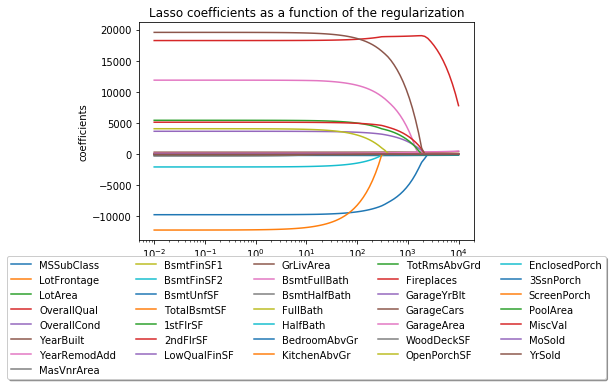

In [55]:
plt.figure(figsize=(12,6))
columns = X_train.columns
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

In [56]:
## coefficients
lasso = linear_model.Lasso(alpha=10e3) # create a lasso instance
lasso.fit(X_train,y_train) # fit data
lasso.intercept_ # print out the coefficients

-1805732.3715066742

In [57]:
list(zip(X_train.columns,lasso.coef_))

[('MSSubClass', -163.12238832807802),
 ('LotFrontage', -13.520226477006437),
 ('LotArea', 0.4041863805218071),
 ('OverallQual', 7804.829528709286),
 ('OverallCond', 0.0),
 ('YearBuilt', 418.50223073578854),
 ('YearRemodAdd', 499.1278636787312),
 ('MasVnrArea', 25.365144444351937),
 ('BsmtFinSF1', 15.173558805564165),
 ('BsmtFinSF2', 0.6354311840289643),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 8.723735602982831),
 ('1stFlrSF', 30.149884108655808),
 ('2ndFlrSF', 30.469821033221056),
 ('LowQualFinSF', 10.80269348089052),
 ('GrLivArea', 28.30450610199291),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.0),
 ('HalfBath', -0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('GarageYrBlt', -4.075123259424558),
 ('GarageCars', 0.0),
 ('GarageArea', 52.36744717841565),
 ('WoodDeckSF', 30.77209676174747),
 ('OpenPorchSF', -12.484479019194465),
 ('EnclosedPorch', 15.319939453425516),
 ('3SsnPorch', 41.35727279770148),
 ('ScreenP

In [58]:
numeric_features=list(zip(X_train.columns,lasso.coef_))

In [59]:
type(numeric_features)

list

In [60]:
features_df = pd.DataFrame({'Feature': X_train.columns,
        'Coefficient': lasso.coef_}) 



In [61]:
features_df.loc[abs(features_df.Coefficient) >1]

,Coefficient,Feature
0,-163.122388,MSSubClass
1,-13.520226,LotFrontage
3,7804.829529,OverallQual
5,418.502231,YearBuilt
6,499.127864,YearRemodAdd
7,25.365144,MasVnrArea
8,15.173559,BsmtFinSF1
11,8.723736,TotalBsmtSF
12,30.149884,1stFlrSF
13,30.469821,2ndFlrSF


### Feature Engineering

In [62]:
X['GLA2'] = X['GrLivArea']**2
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'GLA2'],
      dtype='object')

In [63]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [64]:
selected_columns_3 = ['LotArea', 'OverallQual', 'GLA2']

In [65]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train[selected_columns_3],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
list(zip(X_train[selected_columns_3].columns,lr_model3.coef_))

[('LotArea', 0.8971521352826635),
 ('OverallQual', 36416.21070641908),
 ('GLA2', 0.009053088619676863)]

In [67]:
test_set_pred3 = lr_model3.predict(X_test[selected_columns_3])

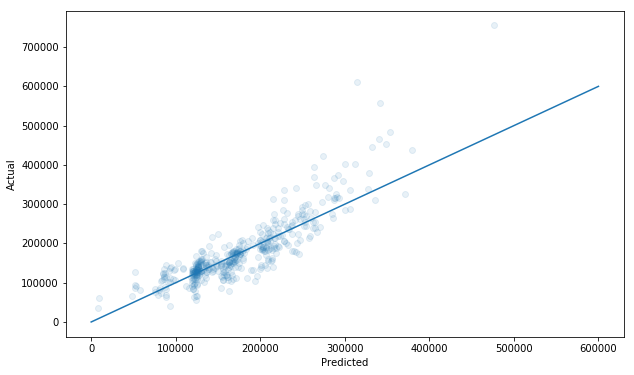

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(test_set_pred3,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000));
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [69]:
#RMSE
root_mean_square_error(y_test,test_set_pred3)

41534.945893882716

In [70]:
#MAD
mean_absolute_deviation(y_test,test_set_pred3)

27349.826192485518

In [71]:
#R-squared
R2_score(y_test, test_set_pred3)

0.7527760747405683